# IMAGE AUGMENTATION

In [11]:
import os
import cv2
from tqdm import tqdm
import random
from shutil import copyfile
import matplotlib.pyplot as plt 
import numpy as np
import os
from tqdm import tqdm 
import cv2


In [18]:
train_path="train"
print("List of Classes:", os.listdir(train_path))

List of Classes: ['Final AD JPEG', 'Final CN JPEG', 'Final EMCI JPEG', 'Final LMCI JPEG', 'Final MCI JPEG']


In [19]:
test_path="test"
print("List of Classes:", os.listdir(test_path))

List of Classes: ['Final AD JPEG', 'Final CN JPEG', 'Final EMCI JPEG', 'Final LMCI JPEG', 'Final MCI JPEG']


In [14]:
labels =['Final AD JPEG', 'Final LMCI JPEG', 'Final MCI JPEG', 'Final CN JPEG', 'Final EMCI JPEG']

In [20]:
X_train=[]
y_train=[]

image_size=162
for i in labels:
    folderDirectory = os.path.join("train", i) #tagging labels by i
    for j in tqdm(os.listdir(folderDirectory)): #tqdm counting
        image=cv2.imread(os.path.join(folderDirectory, j)) #image to array
        image=cv2.resize(image, (image_size, image_size))
        
        X_train.append(image)
        y_train.append(i)

X_train=np.array(X_train)
y_train = np.array(y_train)   

100%|██████████| 204/204 [00:02<00:00, 93.14it/s] 


In [21]:
print("X_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)

X_train Shape: (1101, 162, 162, 3)
y_train Shape: (1101,)


Final AD JPEG:
counts: 145
Final CN JPEG:
counts: 493
Final EMCI JPEG:
counts: 204
Final LMCI JPEG:
counts: 61
Final MCI JPEG:
counts: 198


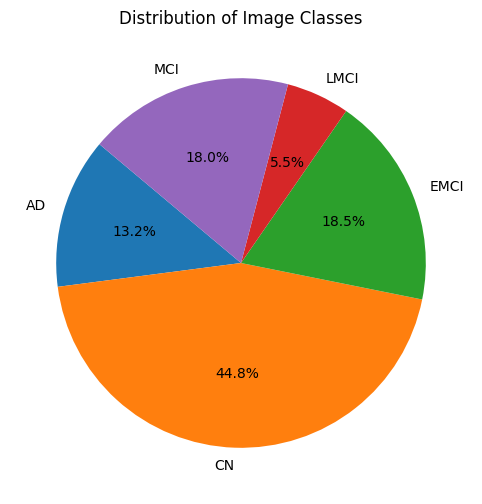

In [22]:
_,y_trainImageInfo= np.unique(y_train, return_counts =True)
print("Final AD JPEG:")
print("counts:", y_trainImageInfo[0])
print("Final CN JPEG:")
print("counts:", y_trainImageInfo[1])
print("Final EMCI JPEG:")
print("counts:", y_trainImageInfo[2])
print("Final LMCI JPEG:")
print("counts:", y_trainImageInfo[3])
print("Final MCI JPEG:")
print("counts:", y_trainImageInfo[4])
import matplotlib.pyplot as plt

# Data
label = ['AD', 'CN', 'EMCI', 'LMCI', 'MCI']
counts = y_trainImageInfo

# Plot
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=label, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Image Classes')
plt.show()


In [23]:
average_count = np.mean(y_trainImageInfo)
print("Average count:", average_count)

Average count: 220.2


creating new train image folder as train_new where each label has 220 images in it 

In [16]:
def flip_image(image):
    return cv2.flip(image, 1)

def rotate_image(image):
    return cv2.rotate(image, cv2.ROTATE_180)

source_dir = 'train'
dest_dir = 'train_new_augmented'
labels = ['Final AD JPEG', 'Final LMCI JPEG', 'Final MCI JPEG', 'Final CN JPEG', 'Final EMCI JPEG']

target_count = 1200

for label in labels:
    source_subfolder = os.path.join(source_dir, label)
    dest_subfolder = os.path.join(dest_dir, label)
    os.makedirs(dest_subfolder, exist_ok=True)
    images = os.listdir(source_subfolder)
    num_images = len(images)
    
    if num_images < target_count:
        while num_images < target_count:
            image_name = random.choice(images)
            image_path = os.path.join(source_subfolder, image_name)
            image = cv2.imread(image_path)
            if random.random() < 0.5:
                modified_image = flip_image(image)
            else:
                modified_image = rotate_image(image)
            new_image_name = f"replicated_{image_name}"
            new_image_path = os.path.join(dest_subfolder, new_image_name)
            cv2.imwrite(new_image_path, modified_image)
            
            num_images += 1
    elif num_images > target_count:
        random.shuffle(images)
        for image_name in images[target_count:]:
            image_path = os.path.join(source_subfolder, image_name)
            os.remove(image_path)
    
    for image_name in images[:target_count]:
        image_path = os.path.join(source_subfolder, image_name)
        dest_image_path = os.path.join(dest_subfolder, image_name)
        copyfile(image_path, dest_image_path)

print("Processing completed.")


Processing completed.


Number of images in 'Final AD JPEG': 1176
Number of images in 'Final LMCI JPEG': 697
Number of images in 'Final MCI JPEG': 1219
Number of images in 'Final CN JPEG': 1224
Number of images in 'Final EMCI JPEG': 1239


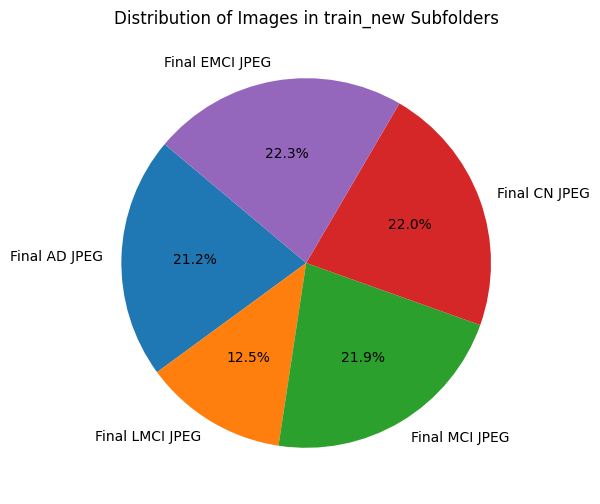

In [24]:
# Function to count images in a folder
def count_images(folder):
    count = 0
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith(".jpeg") or file.endswith(".jpg"):
                count += 1
    return count


# Path to the 'train_new' folder
train_new_folder = "train_new_augmented"

# Labels
labels = [
    "Final AD JPEG",
    "Final LMCI JPEG",
    "Final MCI JPEG",
    "Final CN JPEG",
    "Final EMCI JPEG",
]

# Count images in each subfolder
subfolder_counts = []
for label in labels:
    subfolder_path = os.path.join(train_new_folder, label)
    images_count = count_images(subfolder_path)
    subfolder_counts.append(images_count)
    print(f"Number of images in '{label}': {images_count}")

plt.figure(figsize=(8, 6))
plt.pie(subfolder_counts, labels=labels, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Images in train_new Subfolders")
plt.show()